<a href="https://colab.research.google.com/github/arkwith7/aSSIST_ML/blob/main/%EA%B3%BC%EC%A0%9C_1_%E2%80%93_%EC%B6%A9%EC%A0%84%EC%86%8C_%ED%92%88%EC%A7%88_%EC%A7%84%EB%8B%A8_%EB%AA%A8%EB%8B%88%ED%84%B0%EB%A7%81_%EC%84%9C%EB%B9%84%EC%8A%A4_%EA%B0%9C%EB%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COLAB matplotlib에 한글이 안 깨지도록**
- **한글 '나눔' 폰트를 설치하자**


In [8]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,850 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120874 files and dire

# '런타임 다시 시작'를 진행

In [1]:
!pip install pandas matplotlib seaborn

In [4]:
import pandas as pd
import numpy as np

#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# 브라우저에서 바로 그려지도록
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

In [6]:
# 데이터 생성
np.random.seed(0)
data = {
    '충전소_ID': np.random.choice(range(1, 6), 100),
    '배터리_상태': np.random.normal(80, 10, 100),  # 평균 80%, 표준편차 10%
    '충전_효율': np.random.normal(90, 5, 100),    # 평균 90%, 표준편차 5%
    '충전_횟수': np.random.poisson(5, 100),      # 람다 5
    '충전기_상태': np.random.choice(['정상', '점검필요', '고장', '점검중'], 100)
}


In [7]:
df = pd.DataFrame(data)

# 탐색적 데이터 분석
print(df.describe())


          충전소_ID      배터리_상태       충전_효율       충전_횟수
count  100.00000  100.000000  100.000000  100.000000
mean     2.96000   80.632094   89.301663    5.000000
std      1.44194   10.085123    4.909502    2.309401
min      1.00000   60.092212   72.426159    0.000000
25%      2.00000   73.240393   86.163640    3.000000
50%      3.00000   81.022923   89.128658    5.000000
75%      4.00000   88.243679   92.611783    6.000000
max      5.00000  102.843334   99.606735   12.000000


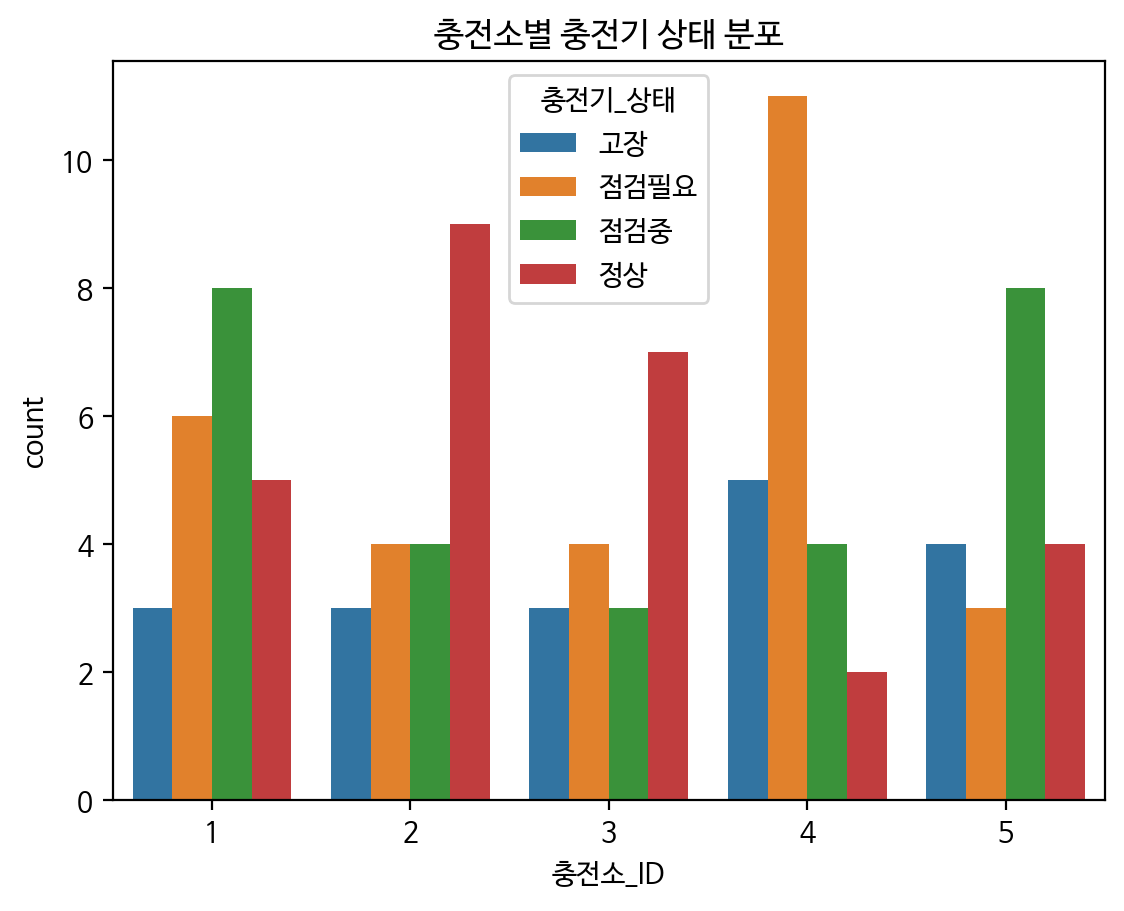

In [8]:
# 데이터 시각화
# 충전소별 충전기 상태 분포
sns.countplot(x='충전소_ID', hue='충전기_상태', data=df)
plt.title('충전소별 충전기 상태 분포')
plt.show()

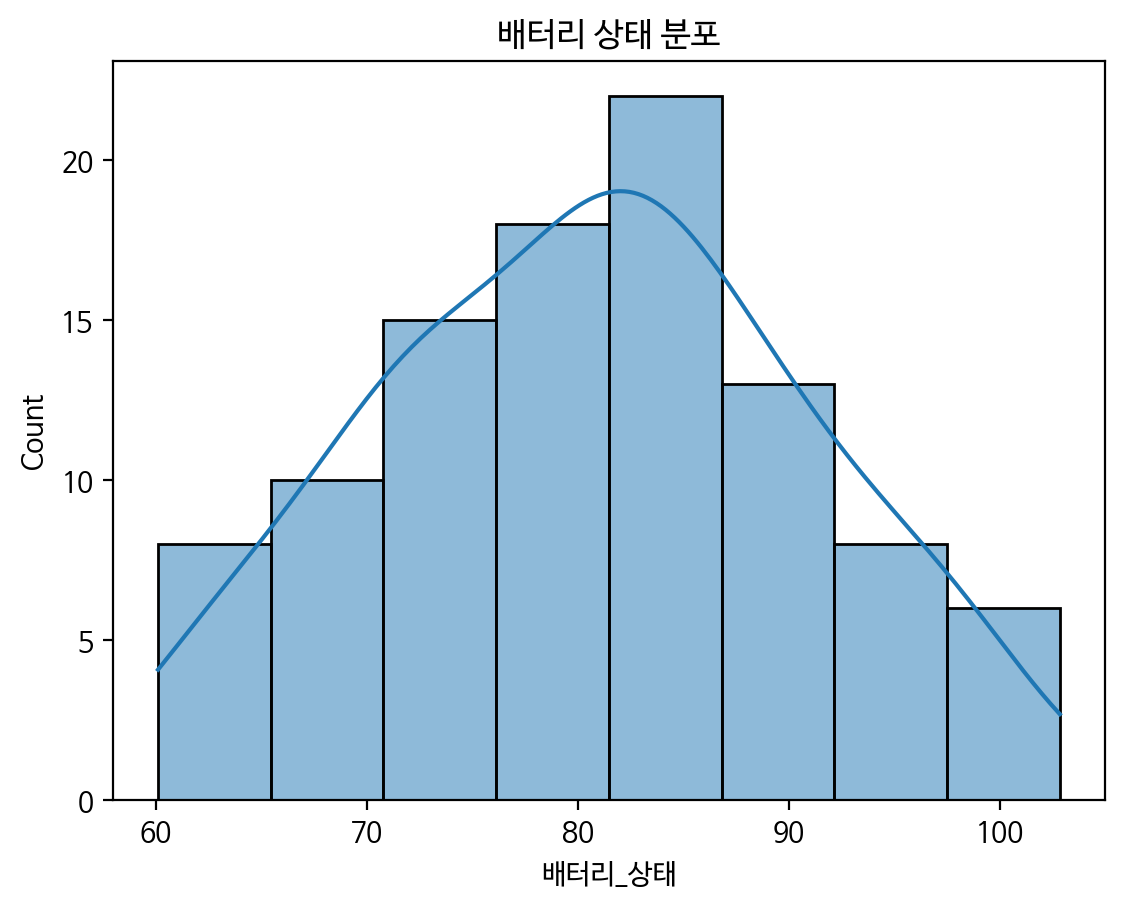

In [9]:
# 배터리 상태 분포
sns.histplot(df['배터리_상태'], kde=True)
plt.title('배터리 상태 분포')
plt.show()

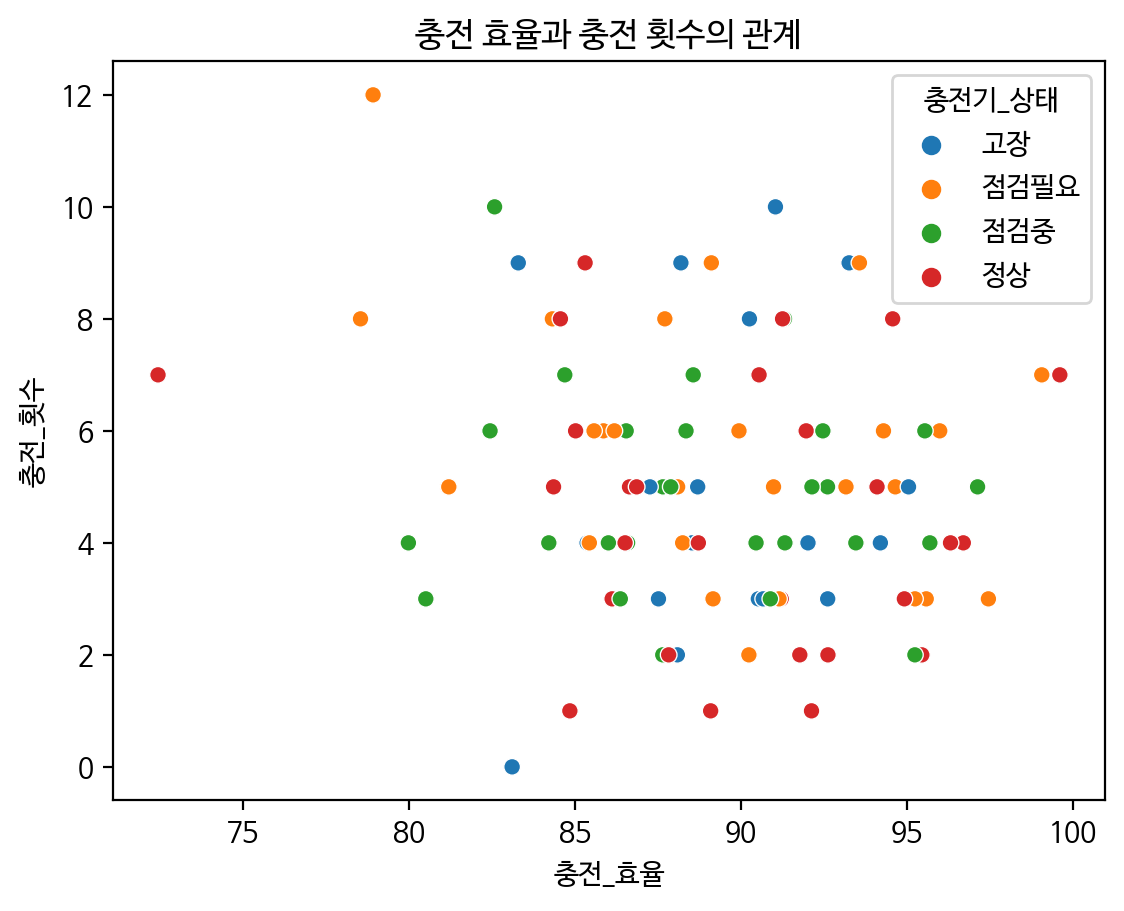

In [10]:
# 충전 효율과 충전 횟수의 관계
sns.scatterplot(x='충전_효율', y='충전_횟수', hue='충전기_상태', data=df)
plt.title('충전 효율과 충전 횟수의 관계')
plt.show()